In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from fuzzywuzzy import fuzz, process
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from scipy import stats
sns.set_theme(style="white")


In [75]:
path = '../data/Data SESAME S1 int.xlsx'
df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Columns: 146 entries, Prénom usuel to Classement.L
dtypes: float64(140), object(6)
memory usage: 652.6+ KB


# Correction des erreurs de typographie dans la colonne Région d'origine

In [76]:
regions = df['Région d\'origine']
regions_correctes= ["Fitovinany", "Atsimo Andrefana", "Menabe", "Haute Matsiatra", "Vakinankaratra", "Boeny", "SAVA", "Tsiroanomandidy", "Atsimo-Andrefana", "Sofia", "Ihorombe", "Itasy","Antsinanana", "Vatovavy", "Analanjirofo", "Alaotra Mangoro", "Atsimo Atsinanana", "Melaky", "DIANA", "Anosy", "Bongolava", "Amoron'i Mania", "BETSIBOKA"]

In [77]:
def trouver_correspondance(region):
    if isinstance(region, str):  # Vérifier si la valeur est une chaîne de caractères
        correspondance = process.extractOne(region, regions_correctes, scorer=fuzz.token_set_ratio)
        if correspondance[1] >= 90:  # Ajustez le seuil en fonction de la similarité souhaitée
            return correspondance[0]
    return region 

In [78]:
regions_corrigees = regions.apply(trouver_correspondance)

In [79]:
df['Région d\'origine'] = regions_corrigees

Query pour chaque seriation

In [86]:
df_L = df.query("`Seriation` == 'L'")
df_L.groupby("Sexe")["Classement.L"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexe,,,,,,,,
F,119.0,16.310924,11.896979,1.0,7.0,14.0,22.00,48.0
G,118.0,18.279661,11.889006,1.0,10.0,17.0,23.75,48.0


In [87]:
df_S = df.query("`Seriation` == 'S'")
df_S.groupby("Sexe")["Classement.S"].describe()

,count,mean,std,min,25%,50%,75%,max
Sexe,,,,,,,,
F,160.0,27.418750,18.100513,1.0,12.75,25.0,40.0,91.0
G,175.0,25.502857,17.620480,1.0,11.50,23.0,37.0,78.0


In [88]:
df_S = df.query("`Seriation` == 'S'")
df_S.groupby("Age")["Classement.S"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
14.1,1.0,38.000000,NaN,38.0,38.00,38.0,38.00,38.0
15.4,1.0,53.000000,NaN,53.0,53.00,53.0,53.00,53.0
15.6,2.0,23.500000,4.949747,20.0,21.75,23.5,25.25,27.0
15.8,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0
15.9,1.0,37.000000,NaN,37.0,37.00,37.0,37.00,37.0
16.1,2.0,6.000000,2.828427,4.0,5.00,6.0,7.00,8.0
16.2,6.0,17.666667,11.360751,5.0,9.50,15.0,26.50,33.0
16.4,1.0,26.000000,NaN,26.0,26.00,26.0,26.00,26.0
16.5,7.0,24.285714,19.635973,6.0,7.50,16.0,39.50,54.0


<Axes: xlabel='Age'>

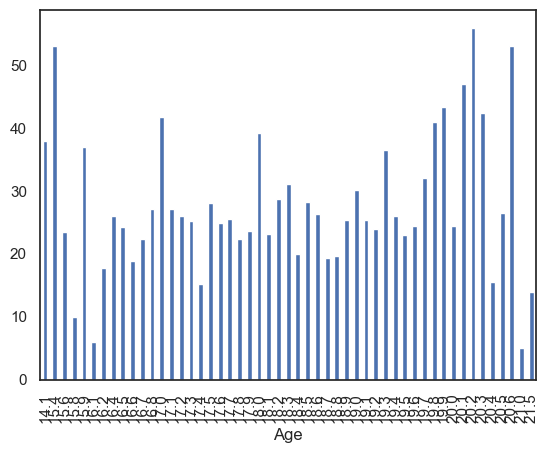

In [83]:
df_S = df.query("`Seriation` == 'S'")
df_S.groupby("Age")["Classement.S"].describe()['mean'].plot.bar()

In [84]:
df_L = df.query("`Seriation` == 'L'")
df_L.groupby("Age")["Classement.L"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0.0,1.0,17.0,NaN,17.0,17.00,17.0,17.00,17.0
15.7,2.0,16.0,0.000000,16.0,16.00,16.0,16.00,16.0
15.8,1.0,2.0,NaN,2.0,2.00,2.0,2.00,2.0
15.9,2.0,34.0,16.970563,22.0,28.00,34.0,40.00,46.0
16.1,2.0,11.5,4.949747,8.0,9.75,11.5,13.25,15.0
...,...,...,...,...,...,...,...,...
20.6,2.0,17.0,21.213203,2.0,9.50,17.0,24.50,32.0
20.7,1.0,17.0,NaN,17.0,17.00,17.0,17.00,17.0
20.8,1.0,16.0,NaN,16.0,16.00,16.0,16.00,16.0


<Axes: xlabel='Age'>

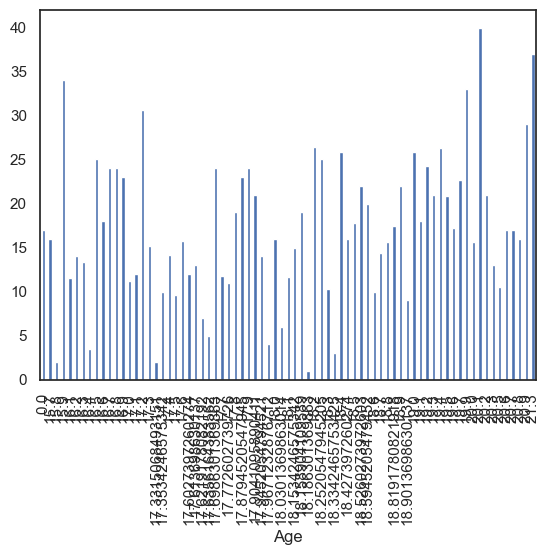

In [85]:
df_L = df.query("`Seriation` == 'L'")
df_L.groupby("Age")["Classement.L"].describe()['mean'].plot.bar()

- it looks like there is a difference of classement entre les F et G. Est-ce-que cette différence est réelle?
- Si la p_value est inf a 2%, on rejette l'hypothese: "il n'y a pas de différence" (on aura au maximum 2% de chance de se tromper) 

In [89]:
alpha = 0.02 # on fixe un risque alpha a 2%
t_stat, pvalue = stats.ttest_ind(df_S.query("`Sexe` == 'F'")["Classement.S"], df_S.query("`Sexe` == 'G'")["Classement.S"])

if pvalue < alpha:
    print("le classement moyen des filles n'est pas le meme que celui des garcons")
else:
    print("on ne peut pas conclure qu'il y a une différence de moyenne entre les filles et les garcons")


on ne peut pas conclure qu'il y a une différence de moyenne entre les filles et les garcons


In [90]:
alpha = 0.02 # on fixe un risque alpha a 2%
t_stat, pvalue = stats.ttest_ind(df_L.query("`Sexe` == 'F'")["Classement.L"], df_L.query("`Sexe` == 'G'")["Classement.L"])

if pvalue < alpha:
    print("le classement moyen des filles n'est pas le meme que celui des garcons")
else:
    print("on ne peut pas conclure qu'il y a une différence de moyenne entre les filles et les garcons")


on ne peut pas conclure qu'il y a une différence de moyenne entre les filles et les garcons


In [91]:
df_S = df.query("`Seriation` == 'S'")

df_S.groupby("Région d'origine")["Classement.S"].describe().query("`count` > 30")['mean']

Région d'origine
Menabe            21.833333
Vakinankaratra    24.365854
Name: mean, dtype: float64

In [92]:
df_L = df.query("`Seriation` == 'L'")

df_L.groupby("Région d'origine")["Classement.L"].describe().query("`count` > 10")['mean']

Région d'origine
Analamanga          17.800000
Atsimo Andrefana    17.944444
Boeny               13.636364
Fitovinany          22.000000
Haute Matsiatra     17.666667
Menabe              14.925926
SAVA                25.764706
Sofia               20.133333
Vakinankaratra       9.740741
Name: mean, dtype: float64

Sur les S

C:\Users\FX506LH\AppData\Local\Temp\ipykernel_5672\2846030438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_S.dropna(axis=1, inplace=True)


<Axes: >

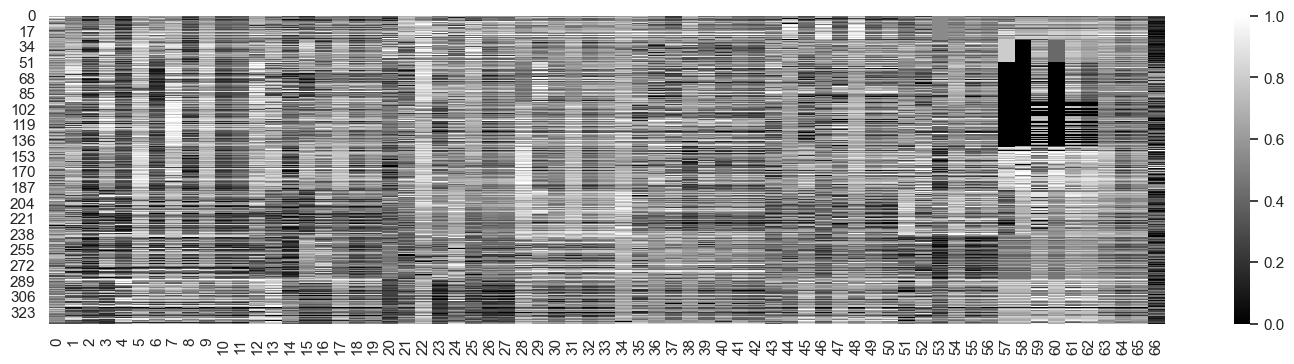

In [93]:
df_S = df.query("`Seriation` == 'S'")
df_S.dropna(axis=1, inplace=True)
df_S = df_S.select_dtypes(exclude="object")
scaler = MinMaxScaler()
X = scaler.fit_transform(df_S)

plt.figure(figsize=(18, 4))
sns.heatmap(X, cmap="gray")

# Séparation définitive en S et L

In [95]:
df_S = df[df['Seriation']=='S']

<Axes: >

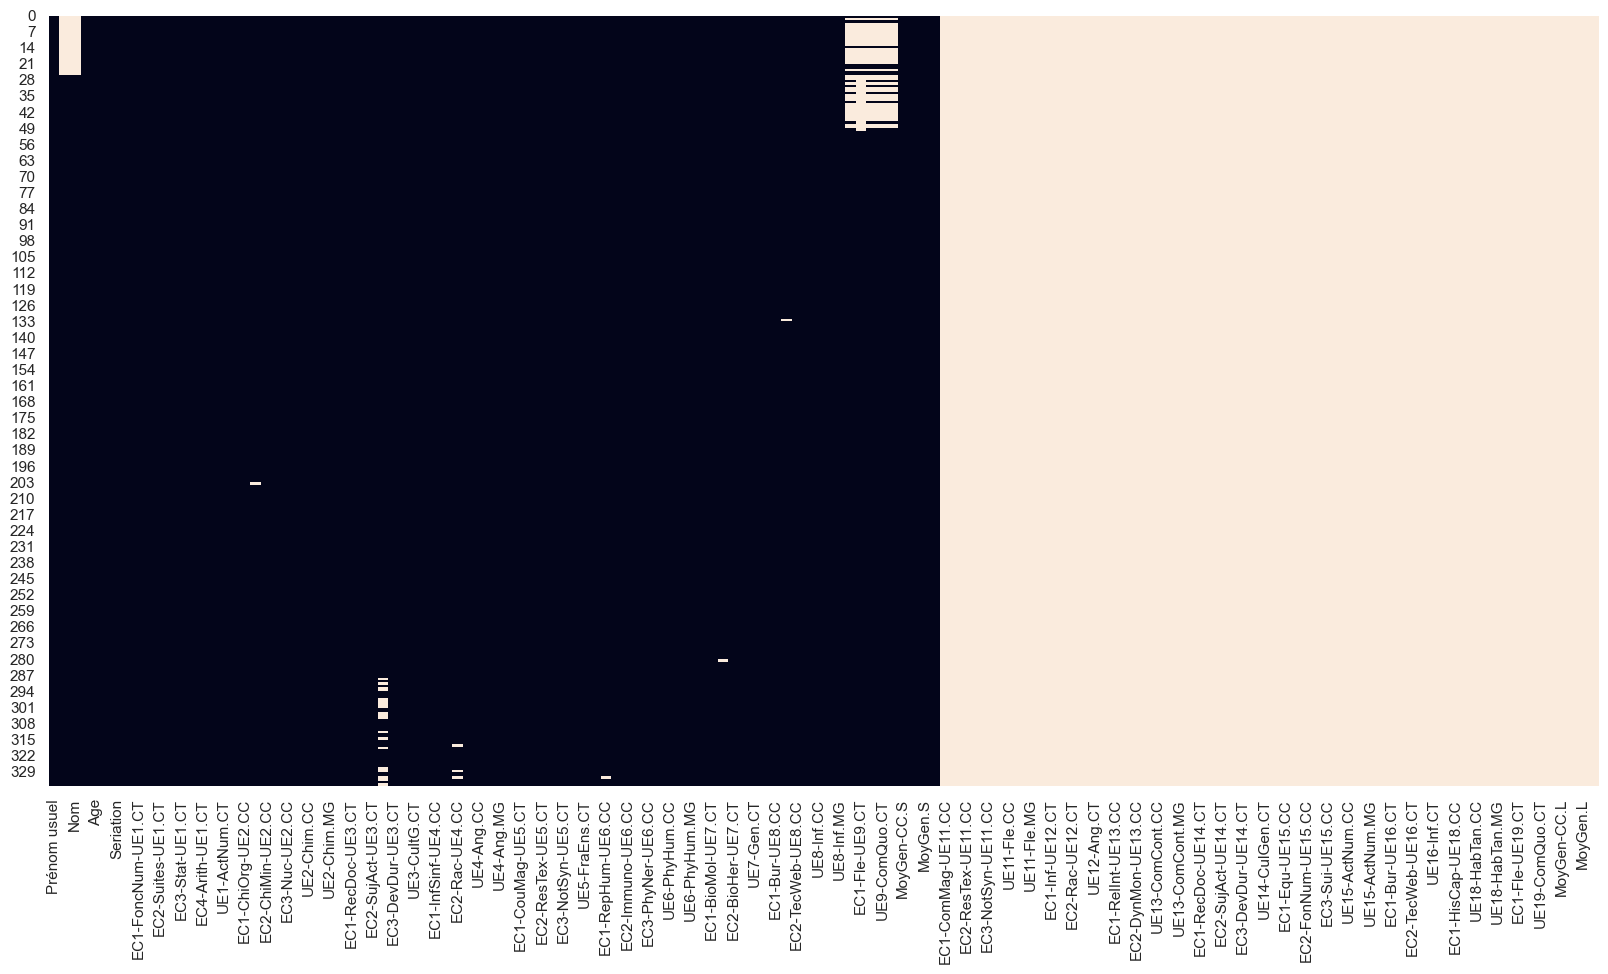

In [96]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_S.isna(),
    cbar=False,
)

In [102]:
# Obtenir le nombre total de lignes dans le DataFrame
total_rows = df_S.shape[0]

# Définir le seuil comme 1% du nombre total de lignes
thresh = total_rows * 0.01

# Éliminer les colonnes avec moins de 1% de valeurs non manquantes
df_S_cleaned = df_S.dropna(axis=1, thresh=thresh)

# Afficher les informations du DataFrame nettoyé pour confirmer la suppression des colonnes
print(df_S_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 334
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Prénom usuel        335 non-null    object 
 1   Prénom              309 non-null    object 
 2   Nom                 309 non-null    object 
 3   Sexe                335 non-null    object 
 4   Age                 335 non-null    float64
 5   Région d'origine    335 non-null    object 
 6   Seriation           335 non-null    object 
 7   EC1-FoncNum-UE1.CC  335 non-null    float64
 8   EC1-FoncNum-UE1.CT  335 non-null    float64
 9   EC2-Suites-UE1.CC   335 non-null    float64
 10  EC2-Suites-UE1.CT   335 non-null    float64
 11  EC3-Stat-UE1.CC     335 non-null    float64
 12  EC3-Stat-UE1.CT     335 non-null    float64
 13  EC4-Arith-UE1.CC    335 non-null    float64
 14  EC4-Arith-UE1.CT    335 non-null    float64
 15  UE1-ActNum.CC       335 non-null    float64
 16  UE1-ActNum.CT

<Axes: >

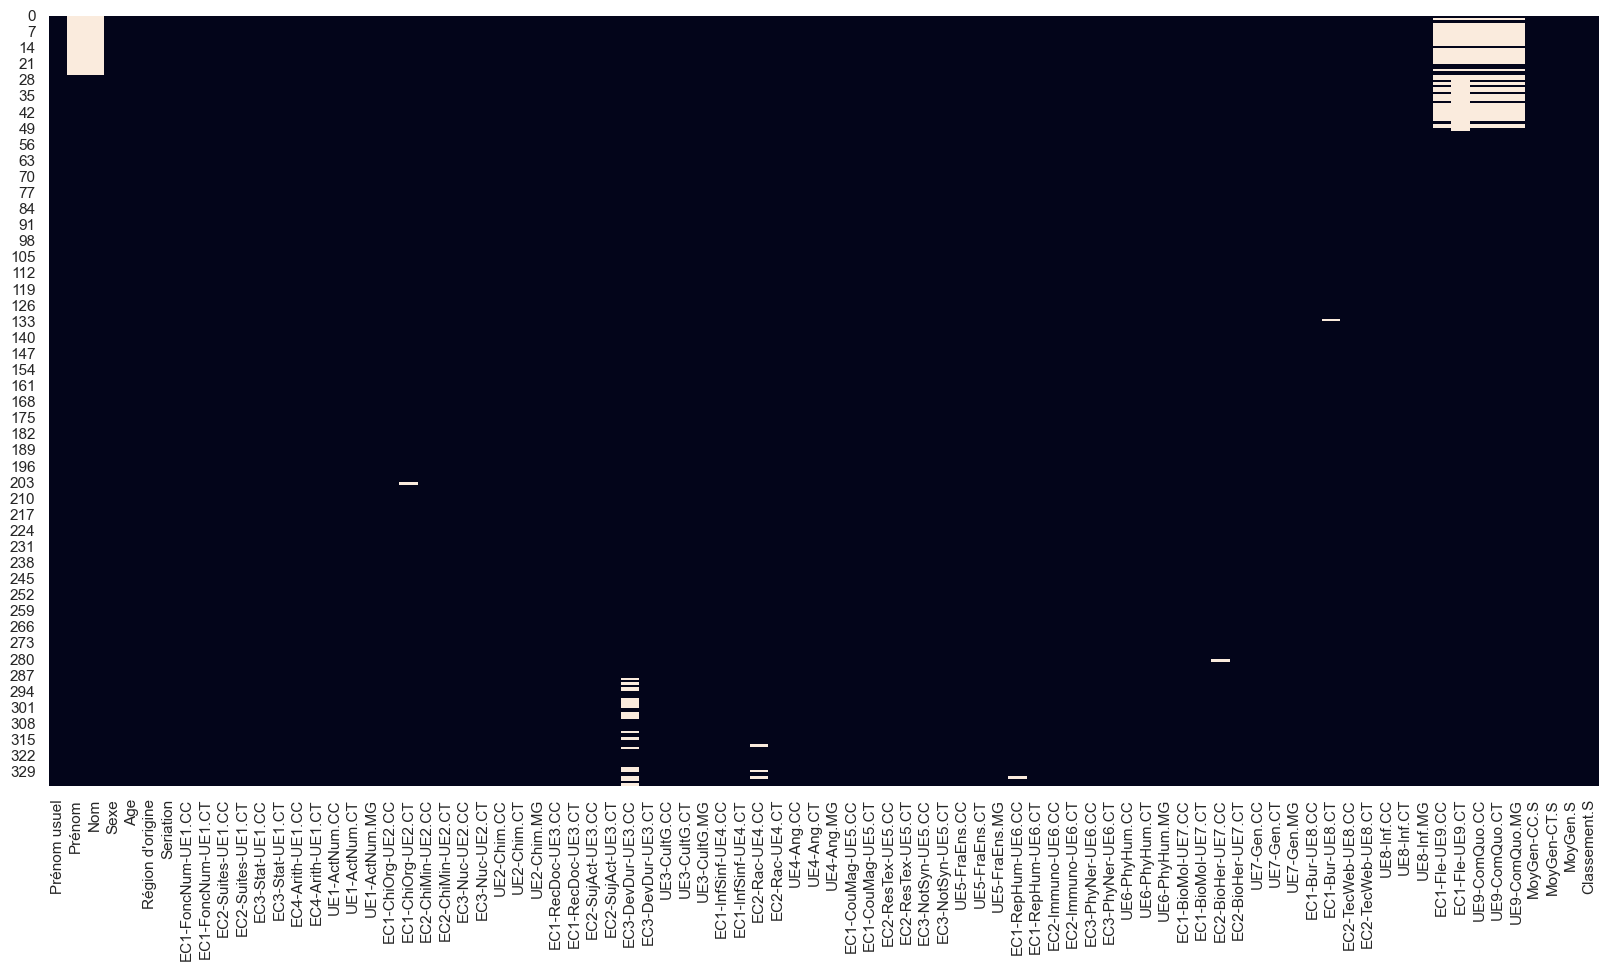

In [103]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_S_cleaned.isna(),
    cbar=False,
)

In [131]:
# Convertiion de toutes les colonnes en numérique, en forçant les non convertibles à NaN

df_S_numeric = df_S_cleaned.apply(pd.to_numeric, errors='coerce')

# Maintenant, on vérifie la corrélation sur le DataFrame converti
correlation_matrix_S = df_S_numeric.corr()

# Pour obtenir la corrélation de chaque caractéristique avec 'Classement.S'
correlation_with_target_S = correlation_matrix_S['Classement.S'].sort_values(ascending=False)

# Pour afficher cette corrélation
print(correlation_with_target_S)

Classement.S          1.000000
Age                   0.075383
EC2-TecWeb-UE8.CC    -0.063805
EC3-DevDur-UE3.CC    -0.073834
EC2-SujAct-UE3.CC    -0.155798
UE8-Inf.CC           -0.159093
EC2-BioHer-UE7.CC    -0.168314
EC1-RepHum-UE6.CC    -0.214452
UE3-CultG.CC         -0.226317
EC1-Bur-UE8.CC       -0.233844
EC1-ChiOrg-UE2.CC    -0.237440
EC3-DevDur-UE3.CT    -0.263437
EC3-Stat-UE1.CC      -0.269153
EC2-ChiMin-UE2.CC    -0.272392
EC1-FoncNum-UE1.CC   -0.280590
EC1-Bur-UE8.CT       -0.280612
EC3-PhyNer-UE6.CC    -0.284952
EC2-Suites-UE1.CC    -0.297055
UE8-Inf.MG           -0.302061
EC4-Arith-UE1.CC     -0.303233
EC3-PhyNer-UE6.CT    -0.305661
EC2-BioHer-UE7.CT    -0.306330
EC2-Immuno-UE6.CC    -0.317928
EC1-RecDoc-UE3.CC    -0.319984
EC2-SujAct-UE3.CT    -0.321828
EC1-CouMag-UE5.CT    -0.331184
EC3-Nuc-UE2.CC       -0.336607
EC1-InfSinf-UE4.CC   -0.337170
EC1-BioMol-UE7.CC    -0.338658
UE8-Inf.CT           -0.342418
EC2-TecWeb-UE8.CT    -0.353781
UE7-Gen.CC           -0.355296
EC2-Rac-

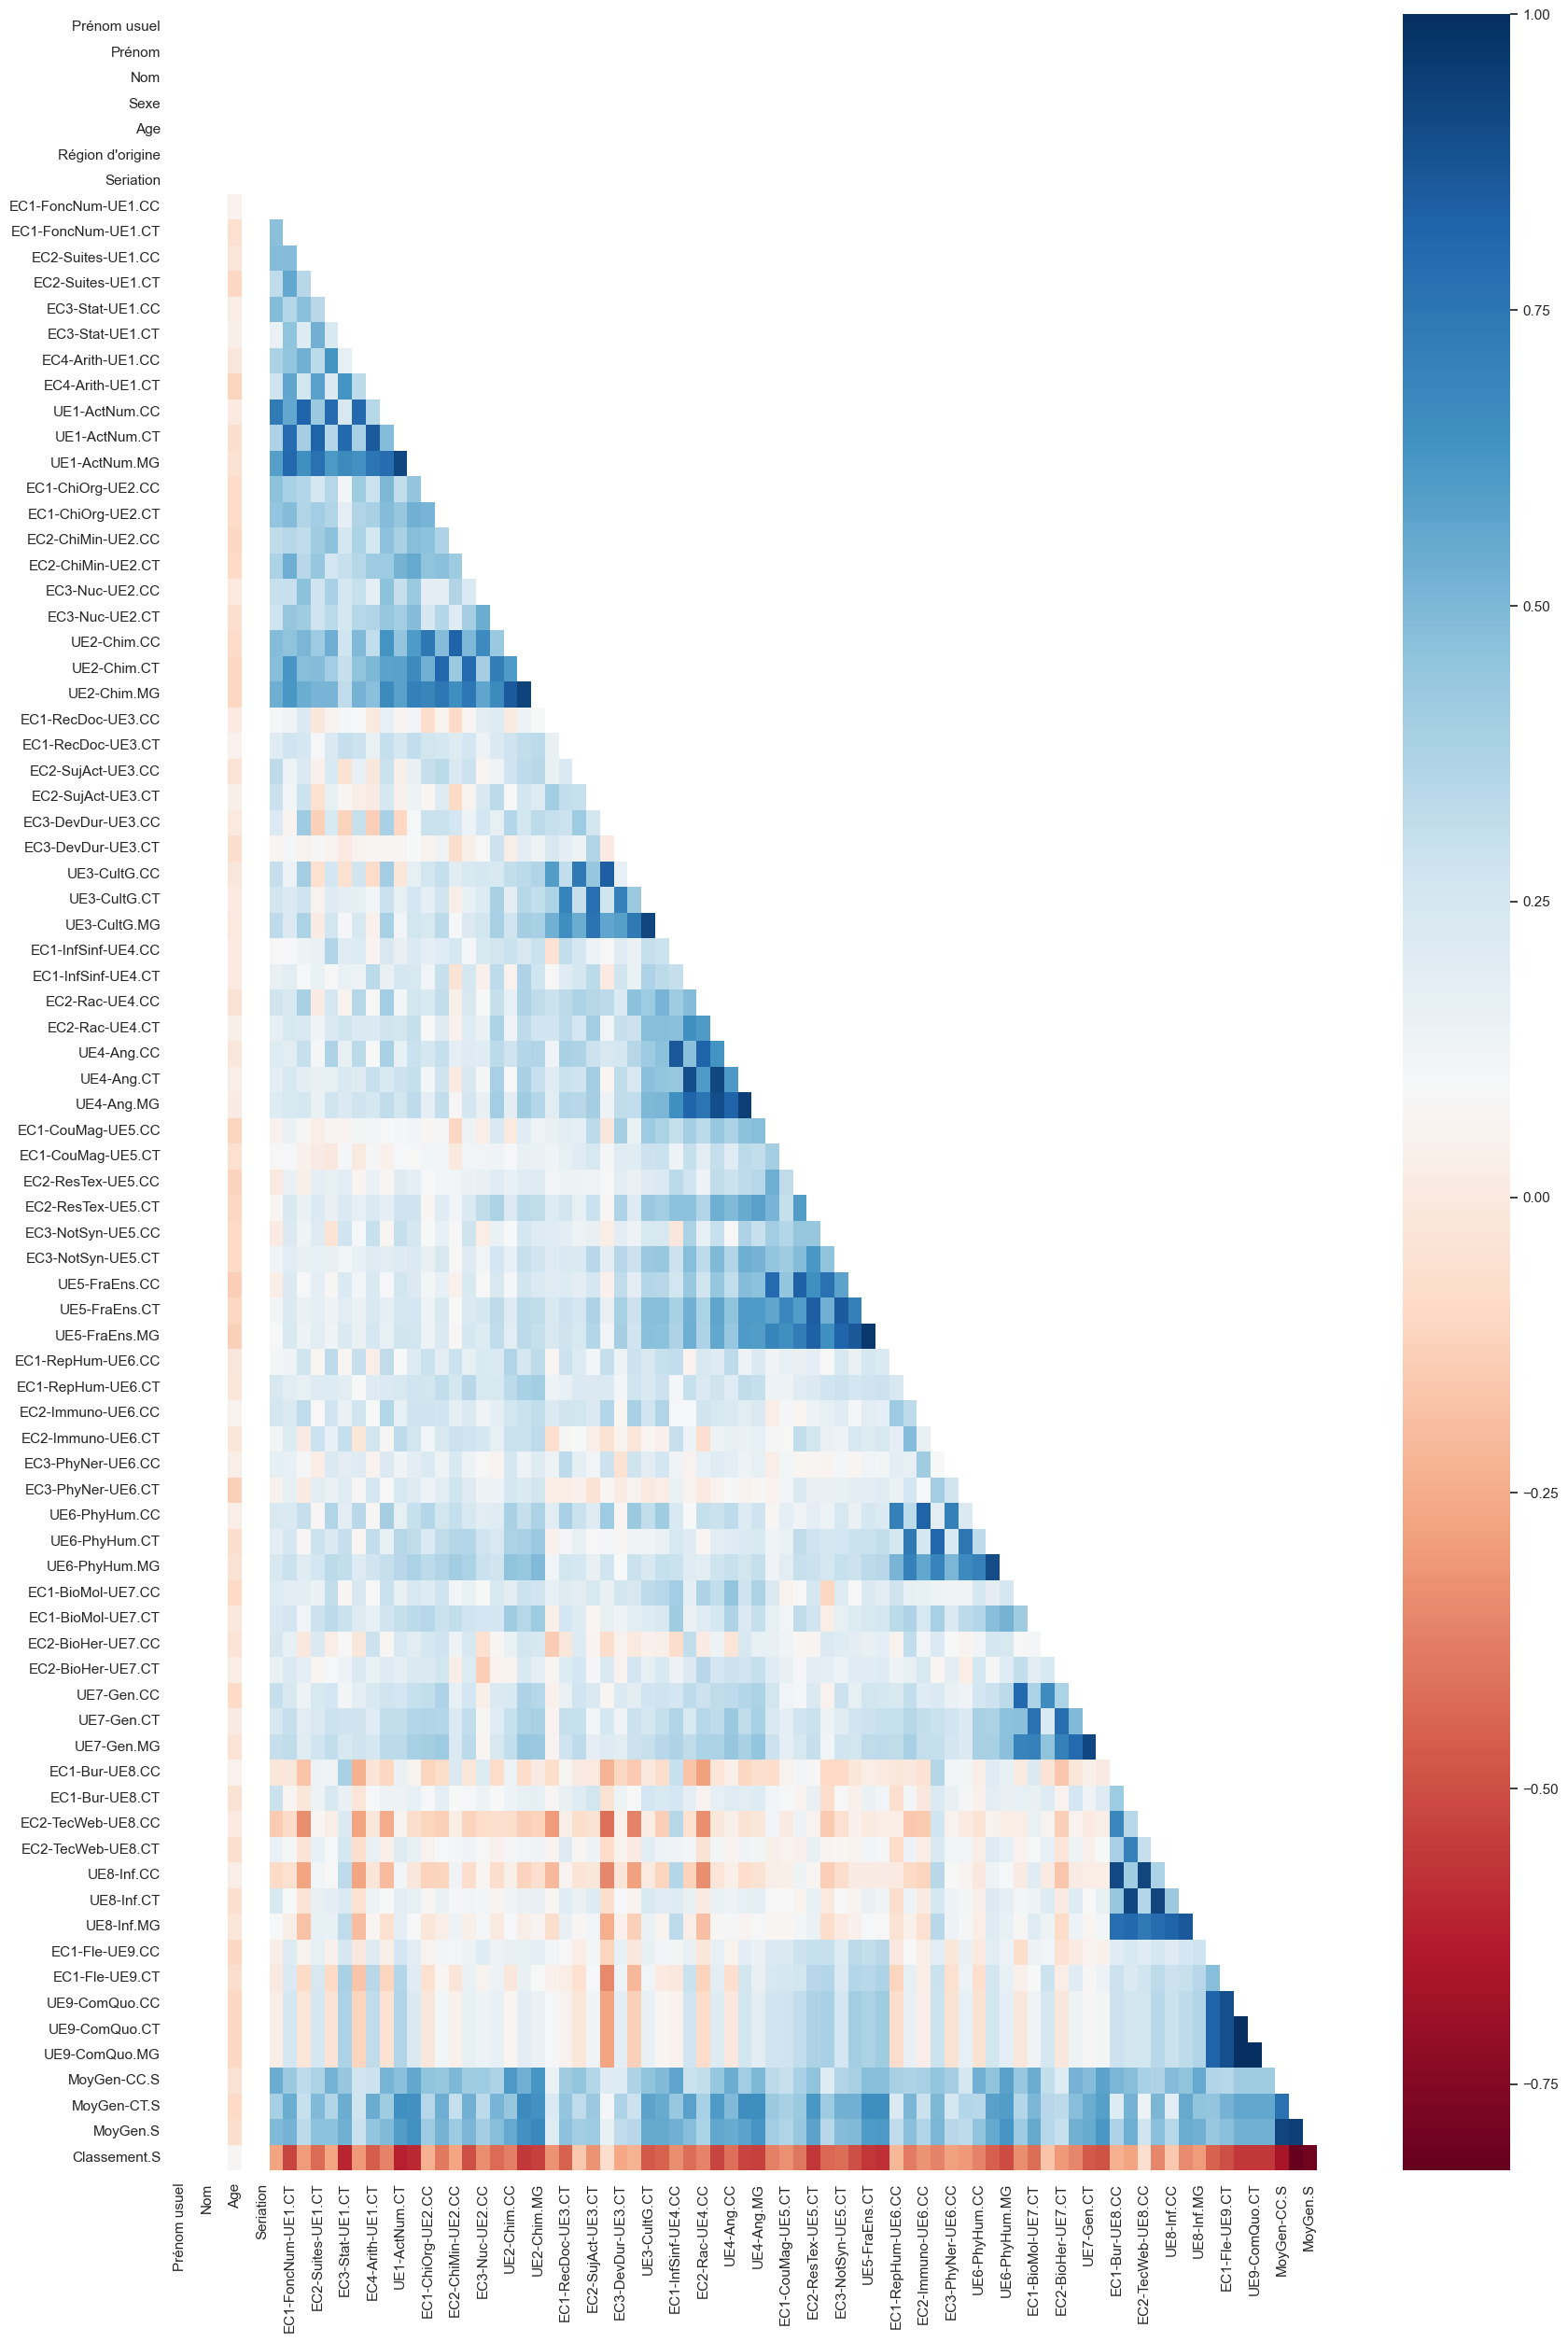

In [132]:
plt.figure(figsize=(20, 30))
sns.heatmap(df_S_numeric.corr(), mask=np.triu(np.ones_like(df_S_numeric.corr(), dtype=bool)), cmap = 'RdBu')
plt.show()

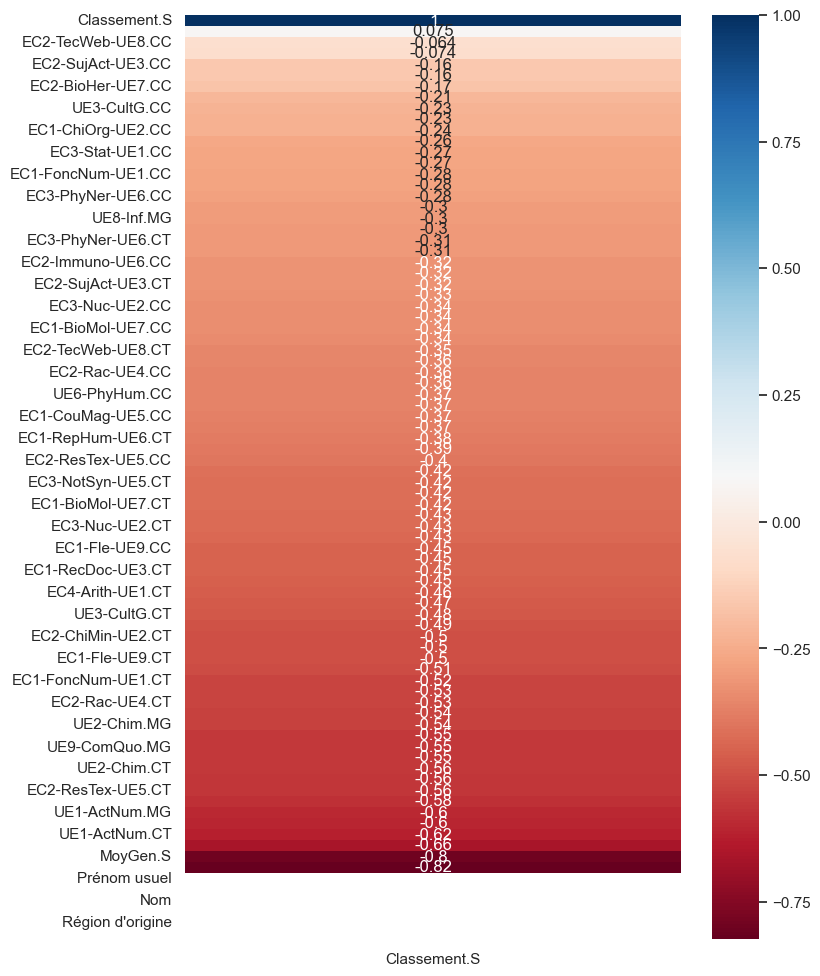

In [133]:
# Supposons que correlation_with_target est une Series avec l'index des caractéristiques
plt.figure(figsize=(8, 12))  # Ajust la taille selon le nombre de caractéristiques
sns.heatmap(correlation_with_target_S.to_frame(), annot=True, cmap='RdBu')
plt.show()

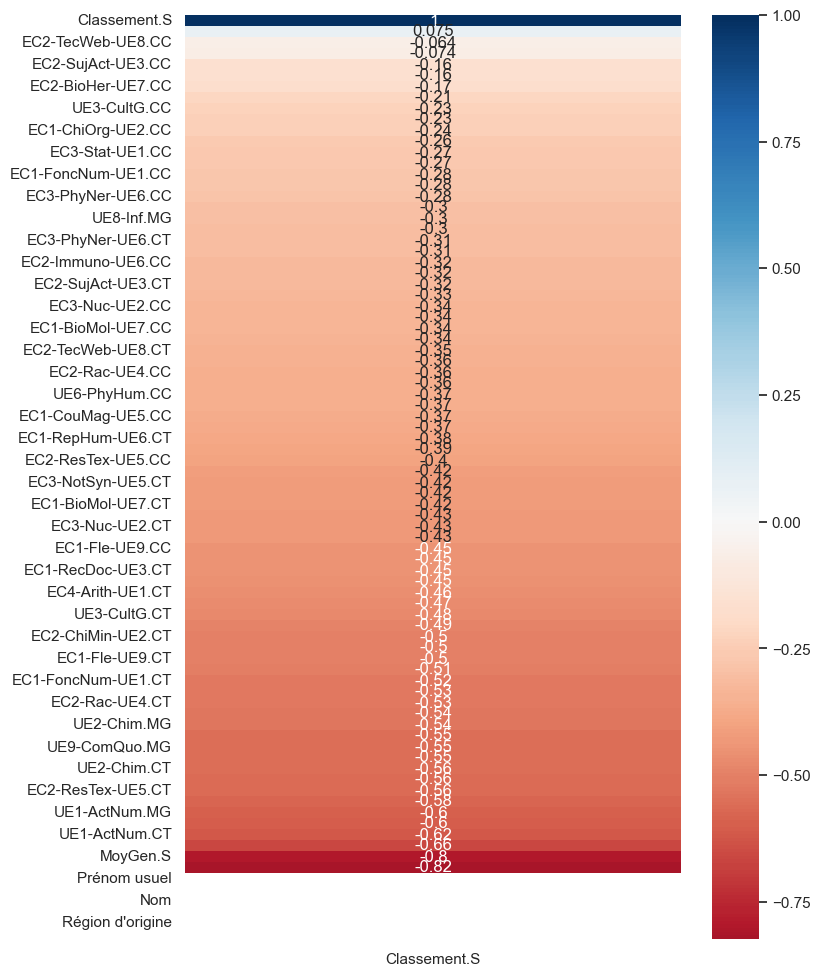

In [134]:
# Tri des valeurs de corrélation
sorted_corr = correlation_with_target_S.sort_values(ascending=False)

# Affichage de la carte de chaleur pour les valeurs triées
plt.figure(figsize=(8, 12))  # Ajustez la taille selon le nombre de caractéristiques
sns.heatmap(sorted_corr.to_frame(), annot=True, cmap='RdBu', center=0)
plt.show()

In [135]:
# Pour obtenir la corrélation de chaque caractéristique avec 'Classement.S'
correlation_with_target_S = correlation_matrix_S['Classement.S'].sort_values(ascending=False)

# Définir l'option pour afficher plus de lignes
pd.set_option('display.max_rows', None)

# Afficher la série de corrélation
print(correlation_with_target_S)

Classement.S          1.000000
Age                   0.075383
EC2-TecWeb-UE8.CC    -0.063805
EC3-DevDur-UE3.CC    -0.073834
EC2-SujAct-UE3.CC    -0.155798
UE8-Inf.CC           -0.159093
EC2-BioHer-UE7.CC    -0.168314
EC1-RepHum-UE6.CC    -0.214452
UE3-CultG.CC         -0.226317
EC1-Bur-UE8.CC       -0.233844
EC1-ChiOrg-UE2.CC    -0.237440
EC3-DevDur-UE3.CT    -0.263437
EC3-Stat-UE1.CC      -0.269153
EC2-ChiMin-UE2.CC    -0.272392
EC1-FoncNum-UE1.CC   -0.280590
EC1-Bur-UE8.CT       -0.280612
EC3-PhyNer-UE6.CC    -0.284952
EC2-Suites-UE1.CC    -0.297055
UE8-Inf.MG           -0.302061
EC4-Arith-UE1.CC     -0.303233
EC3-PhyNer-UE6.CT    -0.305661
EC2-BioHer-UE7.CT    -0.306330
EC2-Immuno-UE6.CC    -0.317928
EC1-RecDoc-UE3.CC    -0.319984
EC2-SujAct-UE3.CT    -0.321828
EC1-CouMag-UE5.CT    -0.331184
EC3-Nuc-UE2.CC       -0.336607
EC1-InfSinf-UE4.CC   -0.337170
EC1-BioMol-UE7.CC    -0.338658
UE8-Inf.CT           -0.342418
EC2-TecWeb-UE8.CT    -0.353781
UE7-Gen.CC           -0.355296
EC2-Rac-

In [136]:
# Définir un seuil de corrélation pour la sélection des caractéristiques (par exemple, 0.3)
seuil_corr = 0.3

# Filtrer les variables ayant une corrélation inférieure au seuil en valeur absolue
variables_importantes_S = correlation_with_target_S[correlation_with_target_S.abs() > seuil_corr].index.tolist()

# Créer un nouveau DataFrame avec seulement les variables importantes
df_S_filtered = df_S_numeric[variables_importantes_S]

# Afficher les informations du DataFrame filtré
print(df_S_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 334
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Classement.S        335 non-null    float64
 1   UE8-Inf.MG          335 non-null    float64
 2   EC4-Arith-UE1.CC    335 non-null    float64
 3   EC3-PhyNer-UE6.CT   335 non-null    float64
 4   EC2-BioHer-UE7.CT   335 non-null    float64
 5   EC2-Immuno-UE6.CC   335 non-null    float64
 6   EC1-RecDoc-UE3.CC   335 non-null    float64
 7   EC2-SujAct-UE3.CT   335 non-null    float64
 8   EC1-CouMag-UE5.CT   335 non-null    float64
 9   EC3-Nuc-UE2.CC      335 non-null    float64
 10  EC1-InfSinf-UE4.CC  335 non-null    float64
 11  EC1-BioMol-UE7.CC   335 non-null    float64
 12  UE8-Inf.CT          335 non-null    float64
 13  EC2-TecWeb-UE8.CT   335 non-null    float64
 14  UE7-Gen.CC          335 non-null    float64
 15  EC2-Rac-UE4.CC      332 non-null    float64
 16  EC2-Immuno-UE

In [140]:
# On prend uniquement les vriables avec une correlation de vvaleur absolue 0.3

columns_to_keep = [
    'EC3-Nuc-UE2.CC', 'EC1-InfSinf-UE4.CC', 'EC1-BioMol-UE7.CC', 
    'EC2-Rac-UE4.CC', 'UE6-PhyHum.CC', 'UE2-Chim.CC', 
    'UE4-Ang.CC', 'EC1-Fle-UE9.CC', 'MoyGen-CC.S','Classement.S'
]
df_S_filtered = df_S_numeric[columns_to_keep]

<Axes: >

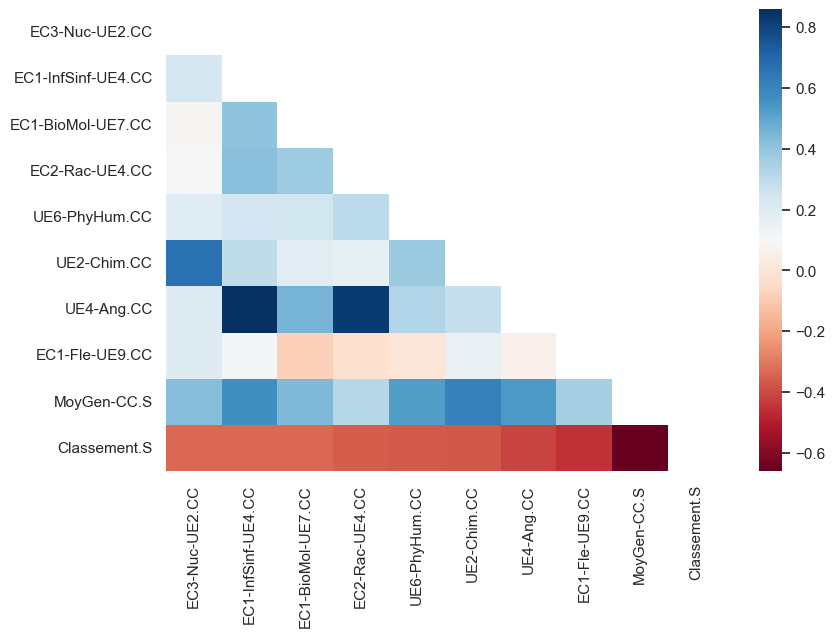

In [112]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_S_filtered.corr(), mask=np.triu(np.ones_like(df_S_filtered.corr(), dtype=bool)), cmap = 'RdBu')

<Figure size 1200x600 with 0 Axes>

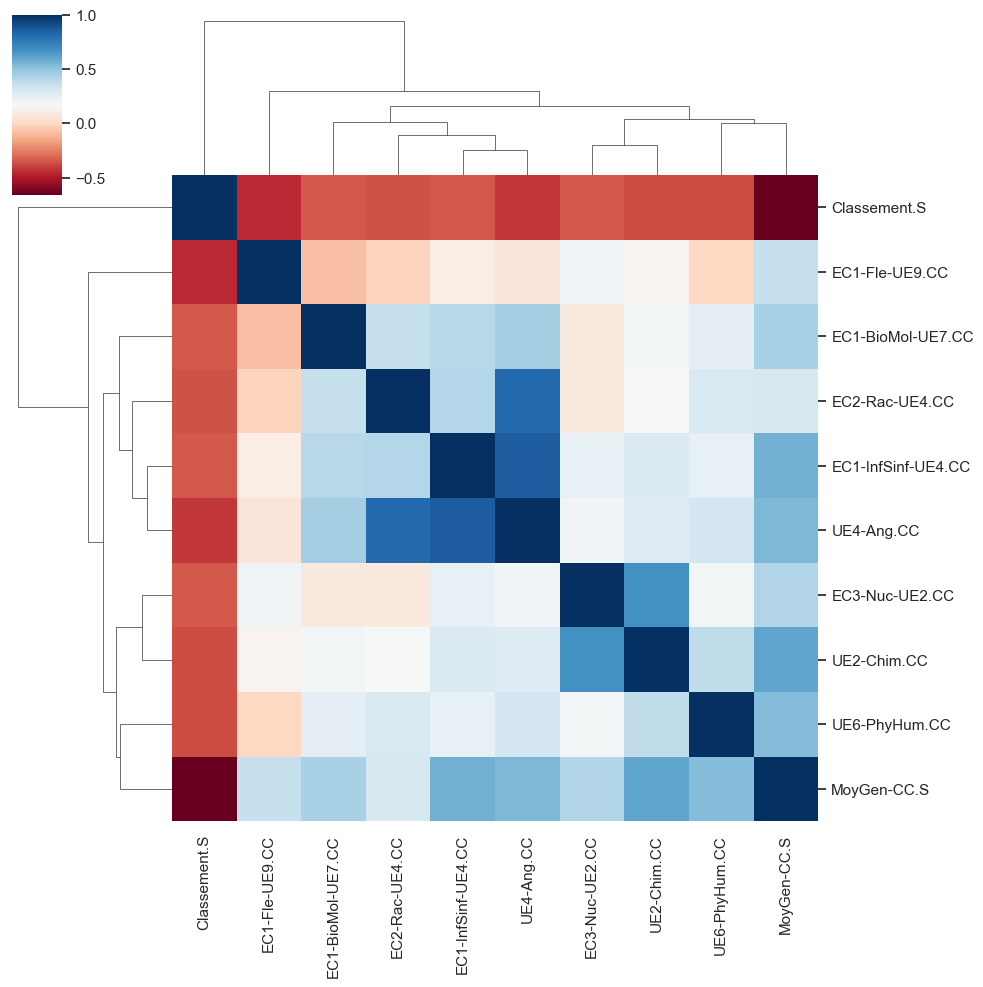

In [113]:
plt.figure(figsize=(12, 6))
sns.clustermap(df_S_filtered.corr().round(2), cmap='RdBu')

In [114]:
df_S_filtered.columns

Index(['EC3-Nuc-UE2.CC', 'EC1-InfSinf-UE4.CC', 'EC1-BioMol-UE7.CC',
       'EC2-Rac-UE4.CC', 'UE6-PhyHum.CC', 'UE2-Chim.CC', 'UE4-Ang.CC',
       'EC1-Fle-UE9.CC', 'MoyGen-CC.S', 'Classement.S'],
      dtype='object')

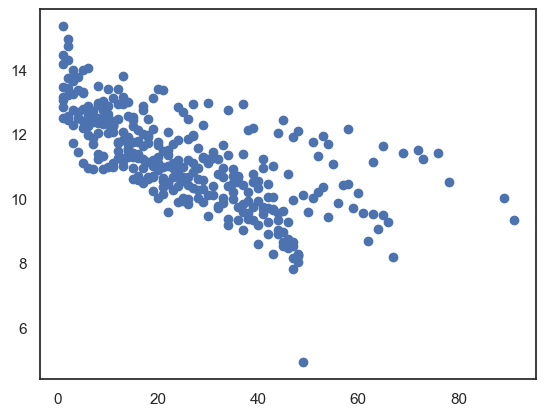

In [115]:
plt.scatter(df_S_filtered["Classement.S"], df_S_filtered["MoyGen-CC.S"])

Sur les L

C:\Users\FX506LH\AppData\Local\Temp\ipykernel_5672\812453140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_L.dropna(axis=1, inplace=True)


<Axes: >

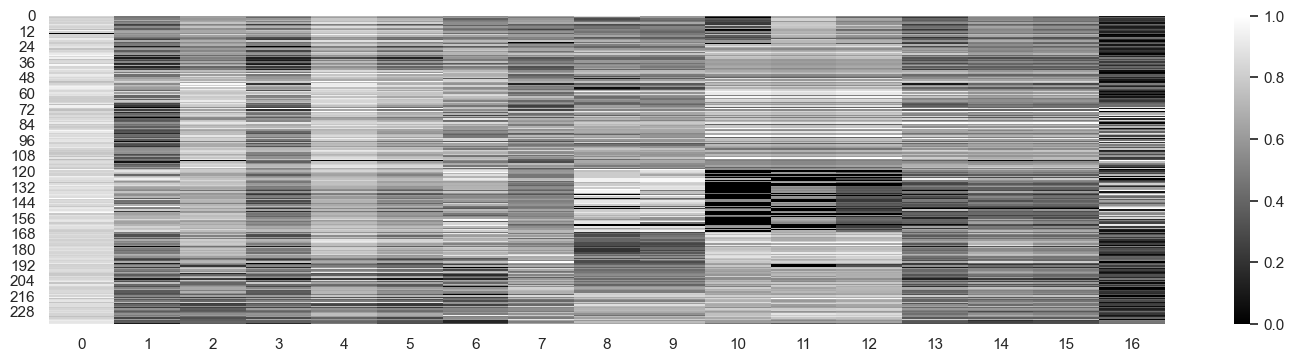

In [116]:
df_L = df.query("`Seriation` == 'L'")
df_L.dropna(axis=1, inplace=True)
df_L = df_L.select_dtypes(exclude="object")
scaler = MinMaxScaler()
X = scaler.fit_transform(df_L)

plt.figure(figsize=(18, 4))
sns.heatmap(X, cmap="gray")

In [118]:
df_L = df[df['Seriation']=='L']

<Axes: >

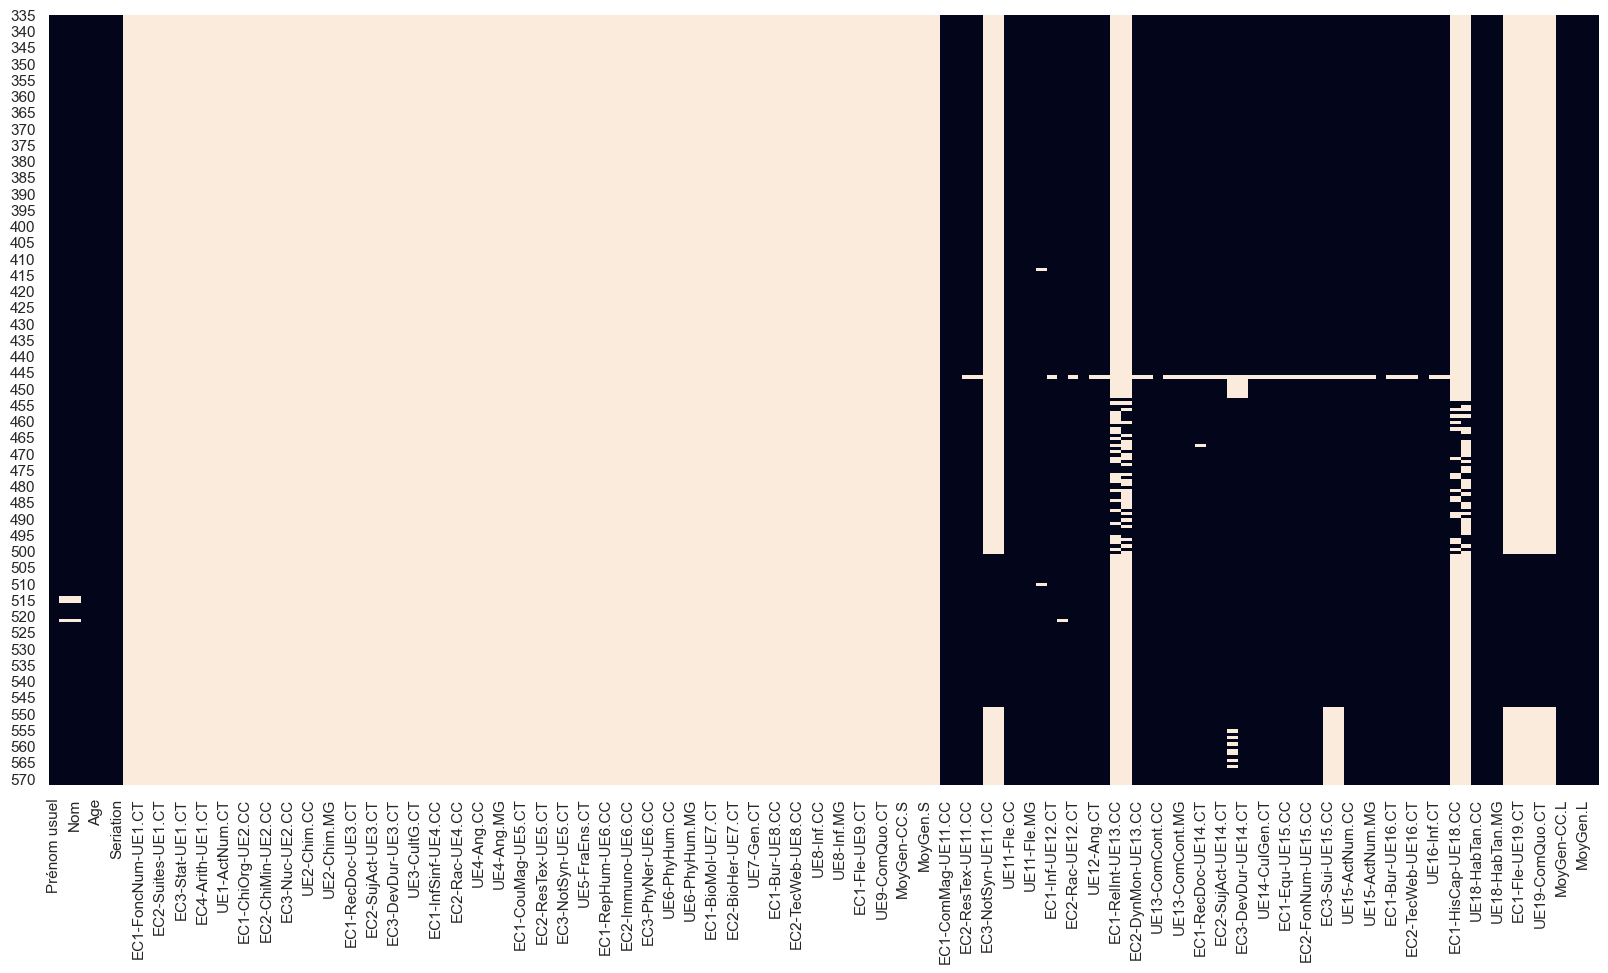

In [119]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_L.isna(),
    cbar=False,
)

In [126]:
# Obtenir le nombre total de lignes dans le DataFrame
total_rows = df_L.shape[0]

# Définir le seuil comme 10% du nombre total de lignes
thresh = total_rows * 0.4

# Éliminer les colonnes avec moins de 1% de valeurs non manquantes
df_L_cleaned = df_L.dropna(axis=1, thresh=thresh)

# Afficher les informations du DataFrame nettoyé pour confirmer la suppression des colonnes
print(df_L_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 335 to 571
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Prénom usuel        237 non-null    object 
 1   Prénom              234 non-null    object 
 2   Nom                 234 non-null    object 
 3   Sexe                237 non-null    object 
 4   Age                 237 non-null    float64
 5   Région d'origine    237 non-null    object 
 6   Seriation           237 non-null    object 
 7   EC1-ComMag-UE11.CC  237 non-null    float64
 8   EC1-ComMag-UE11.CT  237 non-null    float64
 9   EC2-ResTex-UE11.CC  236 non-null    float64
 10  EC2-ResTex-UE11.CT  236 non-null    float64
 11  UE11-Fle.CC         237 non-null    float64
 12  UE11-Fle.CT         237 non-null    float64
 13  UE11-Fle.MG         237 non-null    float64
 14  EC1-Inf-UE12.CC     235 non-null    float64
 15  EC1-Inf-UE12.CT     236 non-null    float64
 16  EC2-Rac-UE1

<Axes: >

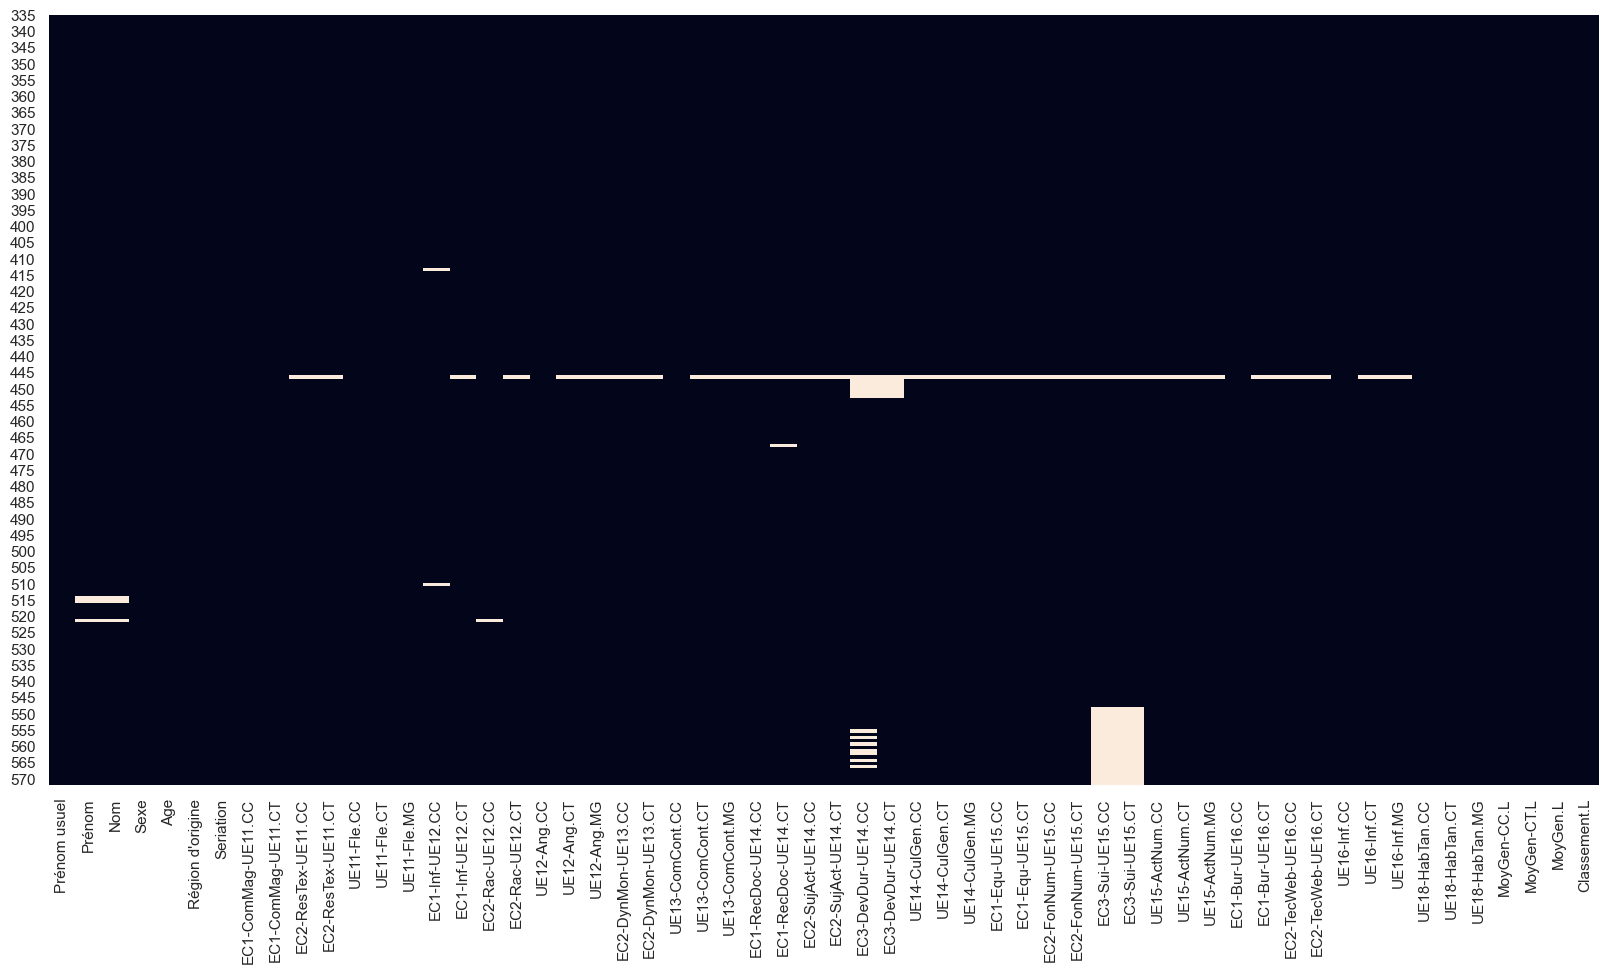

In [127]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df_L_cleaned.isna(),
    cbar=False,
)

In [130]:
# Convertiion de toutes les colonnes en numérique, en forçant les non convertibles à NaN

df_L_numeric = df_L_cleaned.apply(pd.to_numeric, errors='coerce')

# Maintenant, on vérifie la corrélation sur le DataFrame converti
correlation_matrix_L = df_L_numeric.corr()

# Pour obtenir la corrélation de chaque caractéristique avec 'Classement.S'
correlation_with_target_L = correlation_matrix_L['Classement.L'].sort_values(ascending=False)

# Pour afficher cette corrélation
print(correlation_with_target_L)

Classement.L          1.000000
Age                   0.093462
EC3-DevDur-UE14.CT    0.083031
EC1-RecDoc-UE14.CC    0.043392
UE14-CulGen.CC        0.021975
EC3-DevDur-UE14.CC    0.012648
UE14-CulGen.MG       -0.006958
EC2-SujAct-UE14.CC   -0.012139
UE14-CulGen.CT       -0.023689
EC2-TecWeb-UE16.CC   -0.058908
EC2-SujAct-UE14.CT   -0.115713
EC1-ComMag-UE11.CT   -0.116619
UE16-Inf.CC          -0.139482
EC3-Sui-UE15.CC      -0.151363
EC1-Bur-UE16.CC      -0.185913
EC1-RecDoc-UE14.CT   -0.185947
EC3-Sui-UE15.CT      -0.198198
EC1-Equ-UE15.CT      -0.220657
EC2-Rac-UE12.CC      -0.271700
UE15-ActNum.CT       -0.294180
EC2-FonNum-UE15.CC   -0.295155
EC2-FonNum-UE15.CT   -0.311481
UE11-Fle.CT          -0.315547
UE15-ActNum.CC       -0.320971
EC1-Inf-UE12.CC      -0.326962
EC1-ComMag-UE11.CC   -0.331675
UE12-Ang.CC          -0.340050
EC1-Equ-UE15.CC      -0.343917
EC2-ResTex-UE11.CC   -0.351339
UE15-ActNum.MG       -0.364947
EC1-Bur-UE16.CT      -0.375518
EC2-DynMon-UE13.CC   -0.380675
UE11-Fle

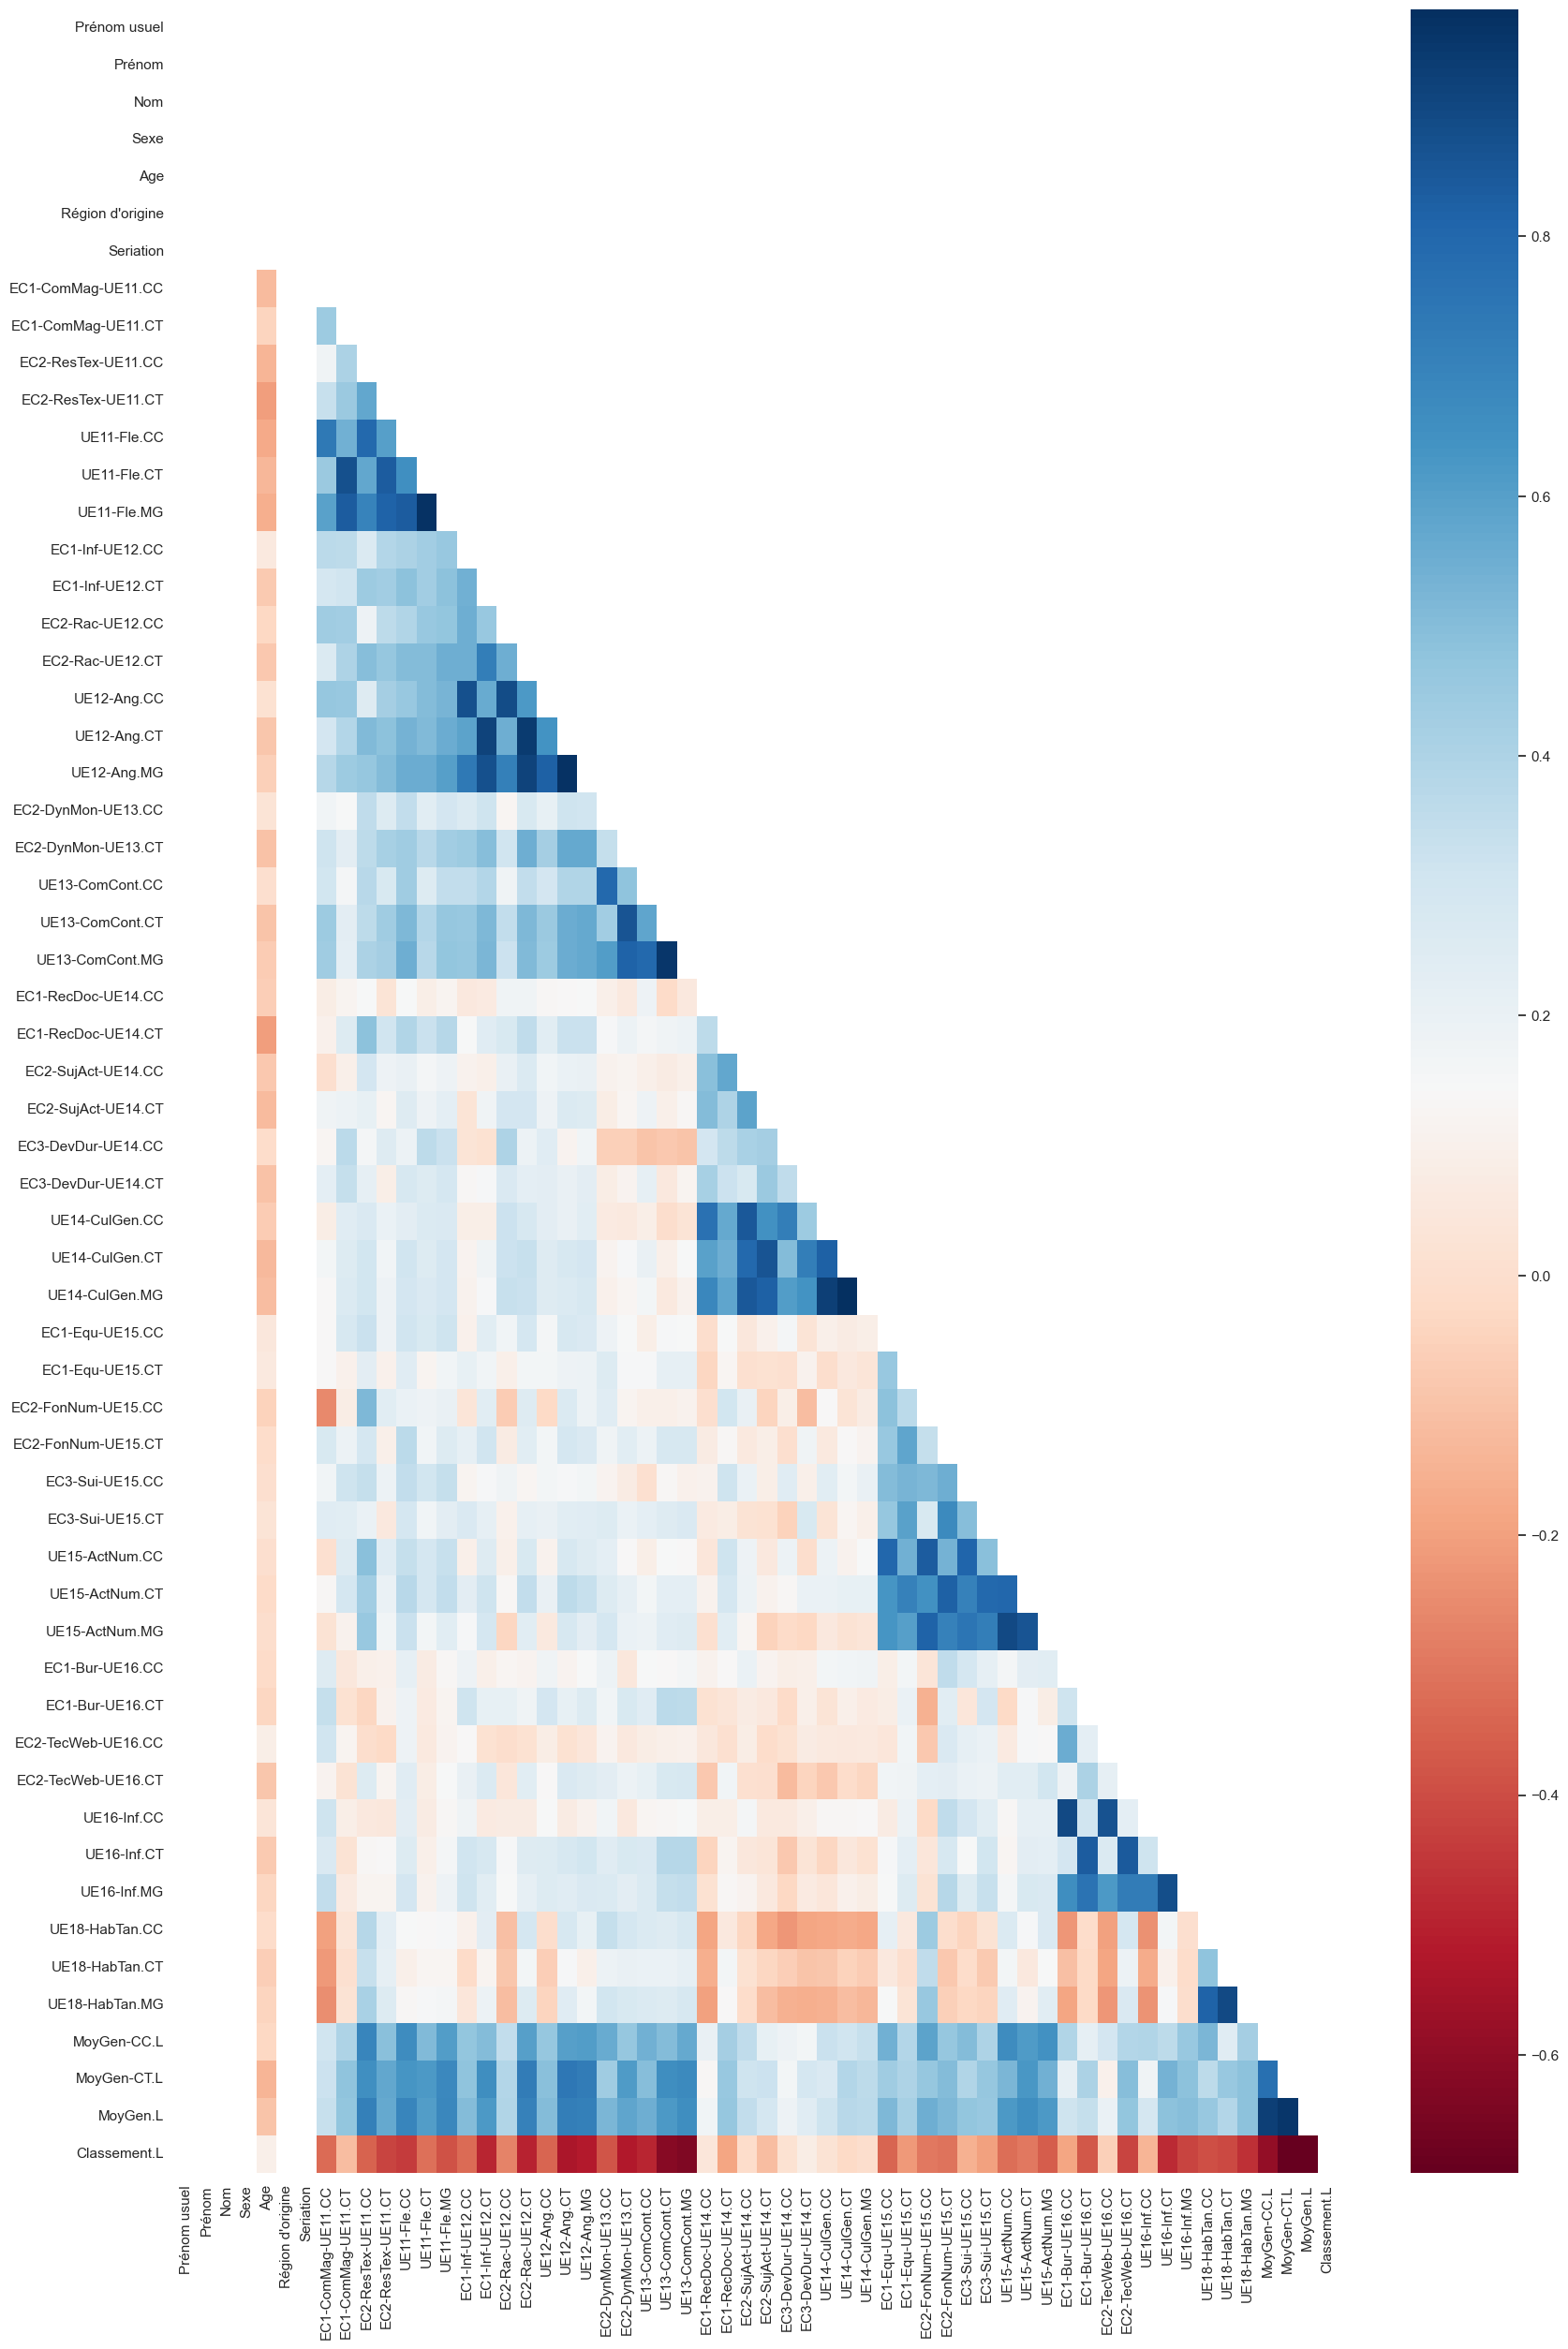

In [129]:
plt.figure(figsize=(20, 30))
sns.heatmap(df_L_numeric.corr(), mask=np.triu(np.ones_like(df_L_numeric.corr(), dtype=bool)), cmap = 'RdBu')
plt.show()

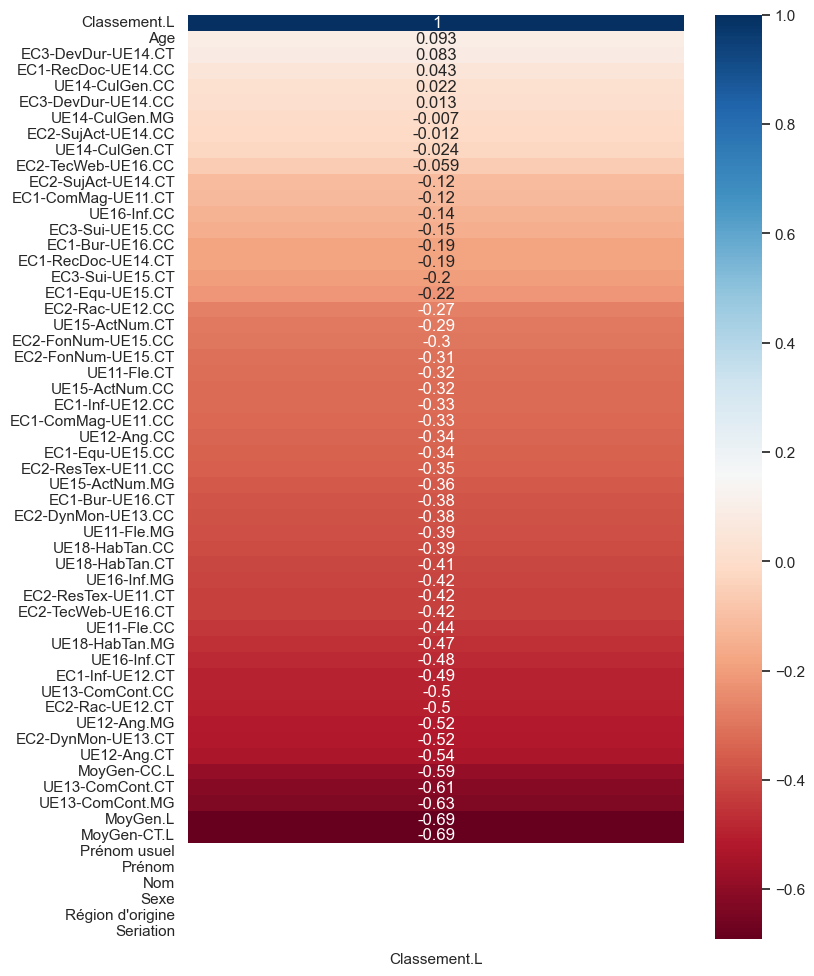

In [137]:
# Supposons que correlation_with_target est une Series avec l'index des caractéristiques
plt.figure(figsize=(8, 12))  # Ajust la taille selon le nombre de caractéristiques
sns.heatmap(correlation_with_target_L.to_frame(), annot=True, cmap='RdBu')
plt.show()

In [138]:
# Pour obtenir la corrélation de chaque caractéristique avec 'Classement.S'
correlation_with_target_L = correlation_matrix_L['Classement.L'].sort_values(ascending=False)

# Définir l'option pour afficher plus de lignes
pd.set_option('display.max_rows', None)

# Afficher la série de corrélation
print(correlation_with_target_L)

Classement.L          1.000000
Age                   0.093462
EC3-DevDur-UE14.CT    0.083031
EC1-RecDoc-UE14.CC    0.043392
UE14-CulGen.CC        0.021975
EC3-DevDur-UE14.CC    0.012648
UE14-CulGen.MG       -0.006958
EC2-SujAct-UE14.CC   -0.012139
UE14-CulGen.CT       -0.023689
EC2-TecWeb-UE16.CC   -0.058908
EC2-SujAct-UE14.CT   -0.115713
EC1-ComMag-UE11.CT   -0.116619
UE16-Inf.CC          -0.139482
EC3-Sui-UE15.CC      -0.151363
EC1-Bur-UE16.CC      -0.185913
EC1-RecDoc-UE14.CT   -0.185947
EC3-Sui-UE15.CT      -0.198198
EC1-Equ-UE15.CT      -0.220657
EC2-Rac-UE12.CC      -0.271700
UE15-ActNum.CT       -0.294180
EC2-FonNum-UE15.CC   -0.295155
EC2-FonNum-UE15.CT   -0.311481
UE11-Fle.CT          -0.315547
UE15-ActNum.CC       -0.320971
EC1-Inf-UE12.CC      -0.326962
EC1-ComMag-UE11.CC   -0.331675
UE12-Ang.CC          -0.340050
EC1-Equ-UE15.CC      -0.343917
EC2-ResTex-UE11.CC   -0.351339
UE15-ActNum.MG       -0.364947
EC1-Bur-UE16.CT      -0.375518
EC2-DynMon-UE13.CC   -0.380675
UE11-Fle

In [139]:
# Définir un seuil de corrélation pour la sélection des caractéristiques (par exemple, 0.3)
seuil_corr = 0.3

# Filtrer les variables ayant une corrélation inférieure au seuil en valeur absolue
variables_importantes_L = correlation_with_target_L[correlation_with_target_L.abs() > seuil_corr].index.tolist()

# Créer un nouveau DataFrame avec seulement les variables importantes
df_L_filtered = df_L_numeric[variables_importantes_L]

# Afficher les informations du DataFrame filtré
print(df_L_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 335 to 571
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Classement.L        237 non-null    float64
 1   EC2-FonNum-UE15.CT  236 non-null    float64
 2   UE11-Fle.CT         237 non-null    float64
 3   UE15-ActNum.CC      236 non-null    float64
 4   EC1-Inf-UE12.CC     235 non-null    float64
 5   EC1-ComMag-UE11.CC  237 non-null    float64
 6   UE12-Ang.CC         237 non-null    float64
 7   EC1-Equ-UE15.CC     236 non-null    float64
 8   EC2-ResTex-UE11.CC  236 non-null    float64
 9   UE15-ActNum.MG      236 non-null    float64
 10  EC1-Bur-UE16.CT     236 non-null    float64
 11  EC2-DynMon-UE13.CC  236 non-null    float64
 12  UE11-Fle.MG         237 non-null    float64
 13  UE18-HabTan.CC      237 non-null    float64
 14  UE18-HabTan.CT      237 non-null    float64
 15  UE16-Inf.MG         236 non-null    float64
 16  EC2-ResTex-

In [143]:
# On prend uniquement les vriables avec une correlation de vvaleur absolue 0.3

columns_to_keep = [ 'EC1-Inf-UE12.CC','EC1-ComMag-UE11.CC', 'EC1-Equ-UE15.CC', 'EC2-ResTex-UE11.CC',
                   'EC2-DynMon-UE13.CC', 'MoyGen-CC.L','Classement.L'
]
df_L_filtered = df_L_numeric[columns_to_keep]

<Axes: >

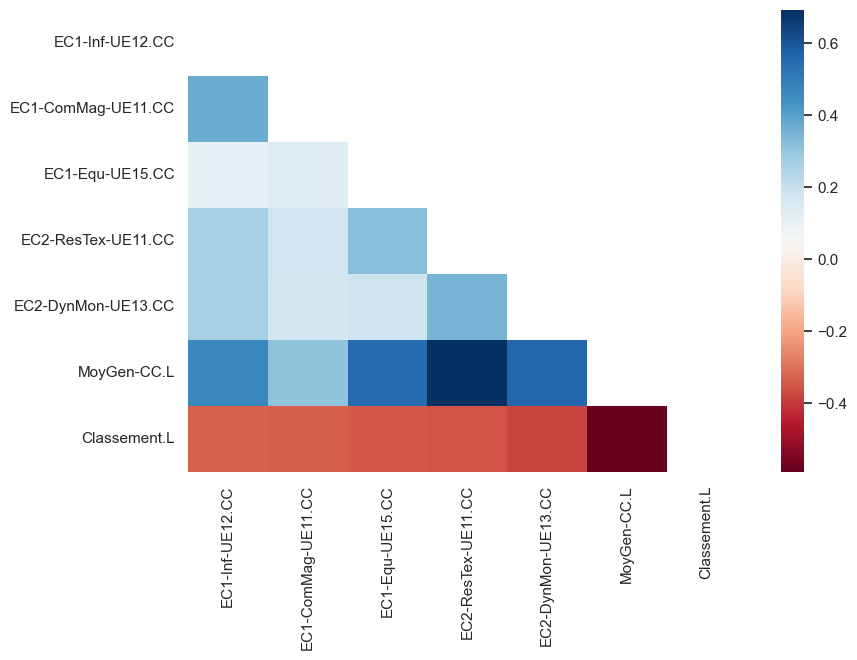

In [145]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_L_filtered.corr(), mask=np.triu(np.ones_like(df_L_filtered.corr(), dtype=bool)), cmap = 'RdBu')

<Figure size 1200x600 with 0 Axes>

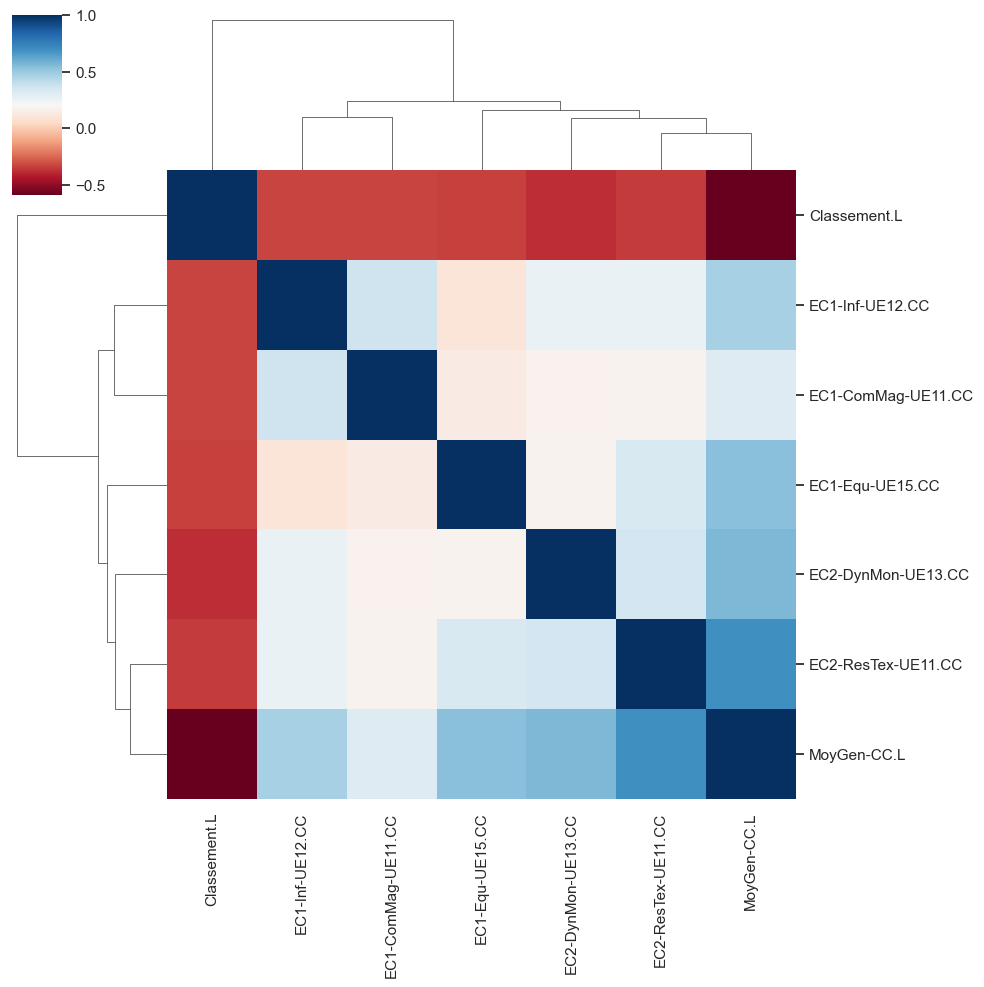

In [146]:
plt.figure(figsize=(12, 6))
sns.clustermap(df_L_filtered.corr().round(2), cmap='RdBu')

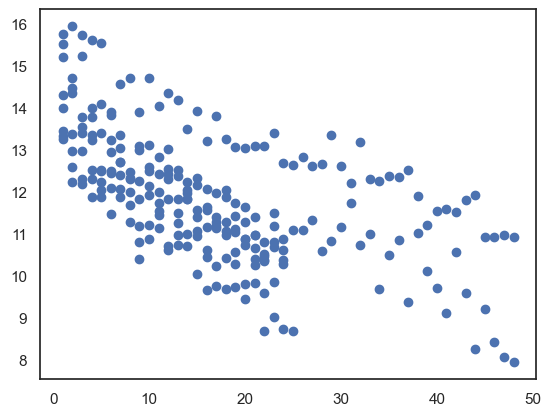

In [147]:
plt.scatter(df_L_filtered["Classement.L"], df_L_filtered["MoyGen-CC.L"])

# Clustering

Sur les S


c:\Users\FX506LH\anaconda3\envs\sesamex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FX506LH\anaconda3\envs\sesamex\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


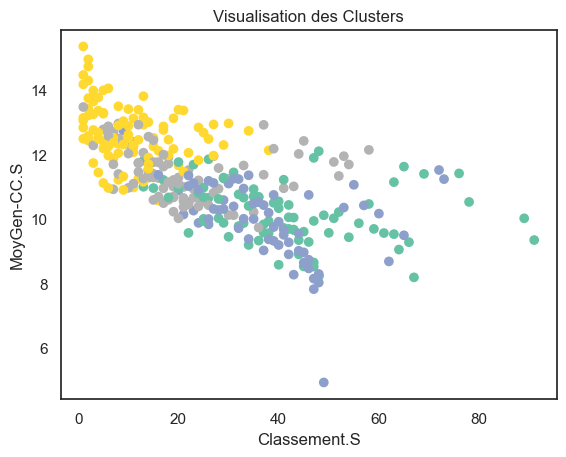

In [149]:
# Remplir les valeurs NaN avec la moyenne de chaque colonne
df_S_filtered = df_S_filtered.fillna(df_S_filtered.mean())

scaler = MinMaxScaler()
X = scaler.fit_transform(df_S_filtered)

pca = PCA(n_components=0.99).fit(X)
X = pca.transform(X)

kmeans = KMeans(n_clusters=4).fit(X)
df_S_filtered["cluster"] = kmeans.predict(X)

plt.scatter(df_S["Classement.S"], df_S["MoyGen-CC.S"], c=df_S_filtered["cluster"], cmap="Set2")
# Ajout des titres aux axes
plt.xlabel('Classement.S')  # Titre de l'axe des abscisses
plt.ylabel('MoyGen-CC.S')  # Titre de l'axe des ordonnées

# Vous pouvez également ajouter un titre général au graphique si nécessaire
plt.title('Visualisation des Clusters')

# Afficher le graphique
plt.show()

Sur les L

c:\Users\FX506LH\anaconda3\envs\sesamex\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FX506LH\anaconda3\envs\sesamex\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


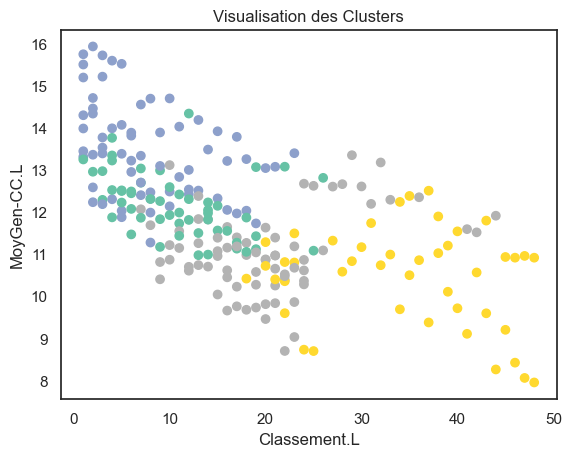

In [150]:
# Remplir les valeurs NaN avec la moyenne de chaque colonne
df_L_filtered = df_L_filtered.fillna(df_L_filtered.mean())

scaler = MinMaxScaler()
X = scaler.fit_transform(df_L_filtered)

pca = PCA(n_components=0.99).fit(X)
X = pca.transform(X)

kmeans = KMeans(n_clusters=4).fit(X)
df_L_filtered["cluster"] = kmeans.predict(X)

plt.scatter(df_L_filtered["Classement.L"], df_L_filtered["MoyGen-CC.L"], c=df_L_filtered["cluster"], cmap="Set2")
# Ajout des titres aux axes
plt.xlabel('Classement.L')  # Titre de l'axe des abscisses
plt.ylabel('MoyGen-CC.L')  # Titre de l'axe des ordonnées

# Vous pouvez également ajouter un titre général au graphique si nécessaire
plt.title('Visualisation des Clusters')

# Afficher le graphique
plt.show()

# Regression


#S


train MAE: 2.9659701492537316
test MAE: 8.94134328358209


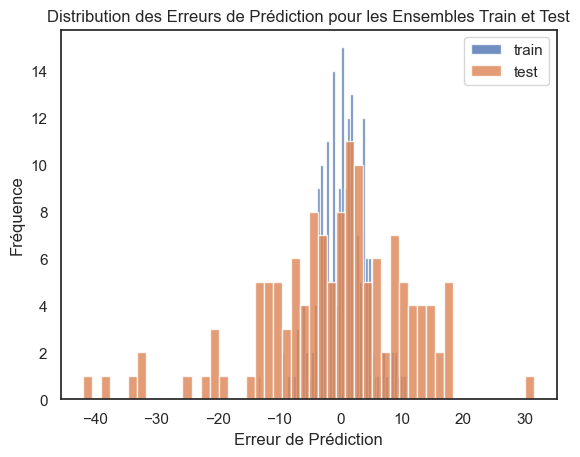

In [152]:
y_S = df_S_filtered["Classement.S"]
X_S = df_S_filtered.drop(['MoyGen-CC.S', 'Classement.S'], axis=1)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.4)

model = make_pipeline(MinMaxScaler(), RandomForestRegressor())
model.fit(X_train_S, y_train_S)
y_pred_train_S = model.predict(X_train_S)
y_pred_test_S = model.predict(X_test_S)

print(f"train MAE: {mean_absolute_error(y_train_S, y_pred_train_S)}")
print(f"test MAE: {mean_absolute_error(y_test_S, y_pred_test_S)}")

plt.hist(y_pred_train_S - y_train_S, bins=50, label="train", alpha=0.8)
plt.hist(y_pred_test_S - y_test_S, bins=50, label="test", alpha=0.8)

# Ajout des titres aux axes et au graphique
plt.xlabel('Erreur de Prédiction')  # Titre de l'axe des abscisses
plt.ylabel('Fréquence')  # Titre de l'axe des ordonnées
plt.title('Distribution des Erreurs de Prédiction pour les Ensembles Train et Test')

plt.legend()
plt.show()

Sur les L

train MAE: 2.332746478873239
test MAE: 4.994947368421053


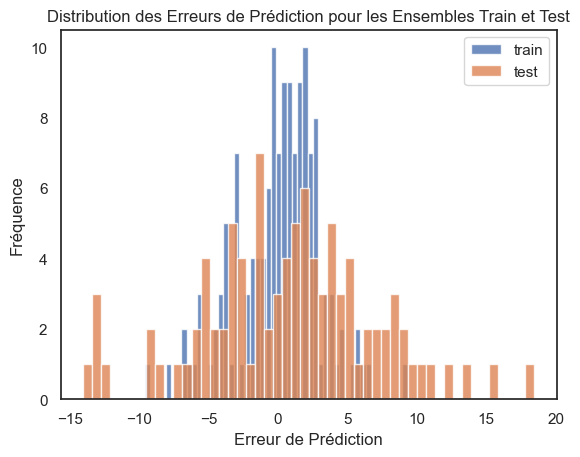

In [153]:
y_L = df_L_filtered["Classement.L"]
X_L = df_L_filtered.drop(['MoyGen-CC.L', 'Classement.L'], axis=1)
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L, y_L, test_size=0.4)

model = make_pipeline(MinMaxScaler(), RandomForestRegressor())
model.fit(X_train_L, y_train_L)
y_pred_train_L = model.predict(X_train_L)
y_pred_test_L = model.predict(X_test_L)

print(f"train MAE: {mean_absolute_error(y_train_L, y_pred_train_L)}")
print(f"test MAE: {mean_absolute_error(y_test_L, y_pred_test_L)}")

plt.hist(y_pred_train_L - y_train_L, bins=50, label="train", alpha=0.8)
plt.hist(y_pred_test_L - y_test_L, bins=50, label="test", alpha=0.8)

# Ajout des titres aux axes et au graphique
plt.xlabel('Erreur de Prédiction')  # Titre de l'axe des abscisses
plt.ylabel('Fréquence')  # Titre de l'axe des ordonnées
plt.title('Distribution des Erreurs de Prédiction pour les Ensembles Train et Test')

plt.legend()
plt.show()